<a href="https://colab.research.google.com/github/ABoulgakov/sketch2face/blob/main/Copie_Quadcore_sketch2face_project_patches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Listes de FS2K à supp

In [3]:
liste_photo1 = [22  ,
27  ,
29  ,
53  ,
72  ,
76  ,
94  ,
107 ,
110 ,
149 ,
166 ,
206 ,
208 ,
228 ,
229 ,
250 ,
259 ,
261 ,
327 ,
331 ,
340 ,
343 ,
397 ,
426 ,
434 ,
503 ,
507 ,
538 ,
576 ,
633 ,
705 ,
716 ,
730 ,
746 ,
782 ,
798 ,
849 ,
6   ,
91  ,
140 ,
137 ,
171 ,
201 ,
205 ,
230 ,
231 ,
233 ,
235 ,
237 ,
245 ,
246 ,
268 ,
278 ,
279 ,
280 ,
325 ,
334 ,
362 ,
394 ,
432 ,
462 ,
470 ,
494 ,
495 ,
508 ,
525 ,
531 ,
537 ,
555 ,
559 ,
562 ,
572 ,
604 ,
618 ,
632 ,
644 ,
652 ,
681 ,
724 ,
717 ,
733 ,
759 ,
762 ,
782 ,
784 ,
783 ,
836 ,
842 ,
858 ,
857 ,
875 ,
903 ,
942 ,
940 ,
983 ,
992 ,
1021    ,
1031    ,
1033    ,
1046    ,
1050    ,
1064    ,
1066    ,
1068    ,
1081    ,
1100    ,
1107    ,
1117    ,
1132    ,
1321    ,
1339    ,
1346    ,
1374    ,
1376    ,
1423    ,
1425    ,
1429    ,
1431    ,
1446    ,
1448    ,
1456    ,
1463    ,
1493    ,
1503    ,
1510    ,
1516    ,
1525    ,
1569    ,
1576    ,
1577    ,
1596    ,
1600    ,
1608    ,
1561    ,
1571    ,
1580    ,
1641    ,
1661    ,
1663    ,
1679    ,
1685    ,
1686    ,
1687    ,
1695    ,
1703    ,
1706    ,
1712    ,
         481, 267, 628,  392  , 1353, 154, 955 ]
liste_photo2 = [2   ,
6   ,
7   ,
11  ,
12  ,
13  ,
14  ,
18  ,
20  ,
23  ,
24  ,
26  ,
31  ,
33  ,
34  ,
35  ,
37  ,
40  ,
41  ,
42  ,
44  ,
45  ,
47  ,
49  ,
50  ,
51  ,
54  ,
55  ,
61  ,
66  ,
71  ,
74  ,
76  ,
77  ,
78  ,
80  ,
81  ,
83  ,
87  ,
90  ,
91  ,
93  ,
95  ,
98  ]
liste_photo3 = [7   ,
8   ,
9   ,
14  ,
17  ,
26  ,
27  ,
31  ,
38  ,
47  ,
55  ,
90  ,
94  ,
1   ,
107 ,
109 ,
111 ,
113 ,
114 ,
117 ,
119 ,
120 ,
123 ,
125 ,
129 ,
134 ,
140 ,
141 ,
142 ,
144 ,
146 ,
147 ,
150 ,
153 ,
154 ,
155 ,
156 ,
159 ,
162 ,
165 ,
167 ,
169 ,
170 ,
172 ,
175 ,
176 ,
177 ,
178 ,
181 ,
184 ,
185 ,
187 ,
188 ,
189 ,
190 ,
191 ,
193 ,
195 ,
198 ,
200 ,
204 ,
206 ,
208 ,
213 ,
218 ,
219 ,
220 ,
222 ,
223 ,
229 ,
231 ,
232 ,
236 ,
237 ,
239 ,
240 ,
241 ,
248 ,
252 ,
253 ,
262 ,
264 ,
265 ,
269 ,
287 ,
288 ,
305 ,
310 ,
317 ,
320 ,
337 ,
346 ,
354 ,
358 ,
360 ,
365 ,
372 ,
373 ,
379 ,
380 ,
381 ,
382 ,
383 ,
386 ,
397 ,
400 ,
408 ,
411 ,
412 ,
414 ,
417 ,
419 ,
424 ,
430 ,
431 ,
434 ,
437 ,
441 ,
445 ,
446 ,
449 ,
456 ,
457 ,
460 ,
469 ,
471 ,
480 ,
221 ,
223 ,
224 ,
242 ,
282 ,
290 ,
309 ,
326 ,
362 ,
374 ,
376 ,
432 ,
433 ,
437 ,
21  ,
25  ,
32  ,
34  ,
35  ,
50  ,
49  ,
52  ,
54  ,
53  ,
62  ,
63  ,
79  ,
97  ,
151 ,
152 ,
160 ,
161 ,
162 ,
173 ,
174 ,
175 ,
197 ,
211 ,
210 ,
209 ,
207 ,
205 ,
217 ,   132, 329]

# FS2K ULTIME ETIENNE ET THALIDA <3


Shape of sketch:  (256, 256, 3)
Shape of image:  (256, 256, 3)
1739


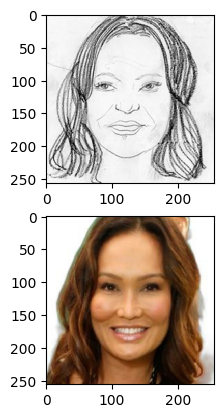

In [4]:
IMG_SIZE = 256

base_element_photo = "/content/drive/My Drive/SKETCH DATA/data/FS2K_ultime/"
base_element_sketch = "/content/drive/My Drive/SKETCH DATA/data/FS2K_rembg/"

def sorted_alphanumeric(data):
      convert = lambda text: int(text) if text.isdigit() else text.lower()
      alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
      return sorted(data,key = alphanum_key)

#création des listes de noms à supprimer
liste_photo1_names = [f"image{str(num).zfill(4)}.jpg" for num in liste_photo1]
liste_sketch1_names = [f"sketch{str(num).zfill(4)}.jpg" for num in liste_photo1]
liste_photo2_names = [f"image{str(num).zfill(4)}.jpg" for num in liste_photo2]
liste_sketch2_names = [f"sketch{str(num).zfill(4)}.jpg" for num in liste_photo2]
liste_photo3_names = [f"image{str(num).zfill(4)}.jpg" for num in liste_photo3]
liste_sketch3_names = [f"sketch{str(num).zfill(4)}.jpg" for num in liste_photo3]
assert(len(liste_photo1_names) == len(liste_sketch1_names))
assert(len(liste_photo2_names) == len(liste_sketch2_names))
assert(len(liste_photo3_names) == len(liste_sketch3_names))

#téléchargement des photos et sletchs et suppresion si elles appartiennent à une liste de noms à supp
file_photo_1 = tf.io.gfile.glob(os.path.join(base_element_photo + "Photo/photo1/*.jpg"))
file_sketch_1 = tf.io.gfile.glob(os.path.join(base_element_sketch + "sketch/sketch1/*.jpg"))
file_photo_2 = tf.io.gfile.glob(os.path.join(base_element_photo + "Photo/photo2/*.jpg"))
file_sketch_2 = tf.io.gfile.glob(os.path.join(base_element_sketch + "sketch/sketch2/*.jpg"))
file_photo_3 = tf.io.gfile.glob(os.path.join(base_element_photo + "Photo/photo3/*.jpg"))
file_sketch_3 = tf.io.gfile.glob(os.path.join(base_element_sketch + "sketch/sketch3/*.jpg"))
selected_photos_1 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([photo for photo in file_photo_1 if os.path.basename(photo) not in liste_photo1_names]))
selected_sketches_1 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([sketch for sketch in file_sketch_1 if os.path.basename(sketch) not in liste_sketch1_names]))
selected_photos_2 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([photo for photo in file_photo_2 if os.path.basename(photo) not in liste_photo2_names]))
selected_sketches_2 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([sketch for sketch in file_sketch_2 if os.path.basename(sketch) not in liste_sketch2_names]))
selected_photos_3 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([photo for photo in file_photo_3 if os.path.basename(photo) not in liste_photo3_names]))
selected_sketches_3 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([sketch for sketch in file_sketch_3 if os.path.basename(sketch) not in liste_sketch3_names]))
assert(len(selected_photos_1) == len(selected_sketches_1))
assert(len(selected_photos_2) == len(selected_sketches_2))
assert(len(selected_photos_3) == len(selected_sketches_3))

#concaténation des trois files
photo_data = selected_photos_1.concatenate(selected_photos_2).concatenate(selected_photos_3)
sketch_data = selected_sketches_1.concatenate(selected_sketches_2).concatenate(selected_sketches_3)
assert(len(photo_data) == len(sketch_data) and len(photo_data) != 0)

#fonction pour loader et preprocesser la data
def load_fs2k_ultime():
  def load_data(photo, sketch):
      image_photo = tf.io.read_file(photo)
      image_photo = tf.io.decode_jpeg(image_photo)
      image_sketch = tf.io.read_file(sketch)
      image_sketch = tf.io.decode_jpeg(image_sketch)
      image_sketch = tf.cast(image_sketch, tf.float32)
      image_photo  = tf.cast(image_photo, tf.float32)
      image_sketch = tf.image.resize(image_sketch, [IMG_SIZE, IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
      image_photo = tf.image.resize(image_photo, [IMG_SIZE,IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
      image_sketch = image_sketch/255.
      image_photo = image_photo/255.
      return image_sketch, image_photo

#On applique la foncition sur un dataset où on merge les sketchs et les photos
  merged_data = tf.data.Dataset.zip((photo_data, sketch_data))
  new_data = merged_data.map(lambda x, y: load_data(x,y))
  assert(len(photo_data) == len(sketch_data) and len(photo_data) != 0)

#On plot pour visualiser
  for element in new_data.take(1):
      fig, ax = plt.subplots(2,1)
      ax[0].imshow(element[0].numpy())
      ax[1].imshow(element[1].numpy())
      print("Shape of sketch: " , element[1].shape)
      print("Shape of image: ", element[0].shape)
  return new_data

#On load effectivement la data
data_fs2k_ultime = load_fs2k_ultime()
print(len(data_fs2k_ultime))
test_data_elements = data_fs2k_ultime.take(5).batch(1)

In [ ]:
#[1387, 1405, 1410, 1414]


In [ ]:
# Vérification de la shape au téléchargement de la photo
#for df in [file_photo_1, file_photo_2, file_photo_3, file_sketch_1, file_sketch_2, file_sketch_3]:
#  print([df[i] for i in range(len(df)) if tf.io.decode_jpeg(tf.io.read_file(df[0])).shape[2] != 3 ])

In [ ]:
#for index, element in enumerate(data_fs2k_ultime):
#  a = element[0].shape[2]
#  if a !=3:
#    print(index)

# Section choix du crop

In [5]:
DATASET = data_fs2k_ultime

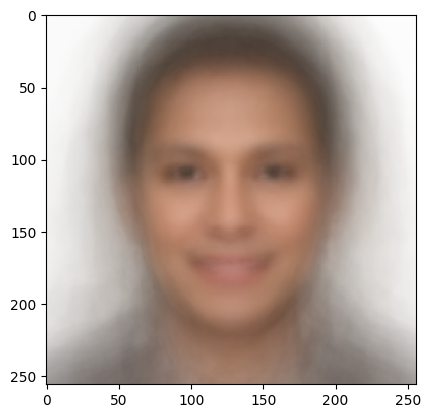

In [6]:
for el in DATASET.take(1):
  init = el[1]
for el in DATASET.take(200):
  init += el[1]

avg_face = init/201
plt.imshow(avg_face);

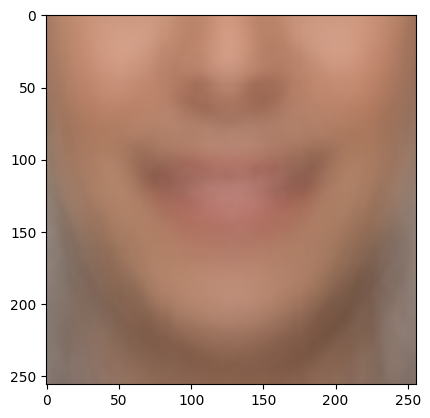

In [7]:
def preproc_crop(input_image, size_vert = (130,30), size_horizontal = (70,70), expand = True):
  img = tf.keras.layers.Cropping2D(cropping = (size_vert,size_horizontal))(input_image[tf.newaxis, ...])
  img = tf.squeeze(img)
  img = tf.image.resize(img, size = (256,256))
  if expand == False:
    return img
  return tf.expand_dims(img, axis = 0)

plt.imshow(preproc_crop(avg_face, size_vert = (130,30), size_horizontal = (70,70), expand = False));

# CUHK  load

In [8]:
#for the CUHK dataset

#the image in the folders are not sorted correctly
#we need to sort them in order to retrieve the faces and the corresponding sketches

main_path = "/content/drive/My Drive/SKETCH DATA/data/CUHK"
test_data_path = "/content/drive/My Drive/SKETCH DATA/data/CUHK/Test element"



def load_cuhk(main_path):

  def sorted_alphanumeric(data):
      convert = lambda text: int(text) if text.isdigit() else text.lower()
      alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
      return sorted(data,key = alphanum_key)

  photo_files = os.path.join(main_path, "photos")
  sketch_files = os.path.join(main_path, "sketches")

  photos = sorted_alphanumeric(os.listdir(photo_files))
  sketches = sorted_alphanumeric(os.listdir(sketch_files))


  #the paths have to be modified according to the user files
  photos = [main_path + "/" + "photos" +"/"+ element for element in photos]
  sketches = [main_path + "/" + "sketches" +"/"+ element for element in sketches]

  #loading the iamge and transforming them into tensors
  def load_data(path):
      image = tf.keras.utils.load_img(path)
      image = tf.keras.utils.img_to_array(image)
      image = image/255.
      return image

  data_photo = []

  for photo in photos :
      image = load_data(photo)
      data_photo.append(image)

  data_sketch = []

  for sketch in sketches:
      image = load_data(sketch)
      data_sketch.append(image)

  data_photo = np.array(data_photo)
  data_sketch = np.array(data_sketch)


  #construcing the dataset
  #containing of photos and corresponding sketches
  data = tf.data.Dataset.from_tensor_slices((data_photo, data_sketch))


  IMG_SIZE = 256

  def preprocess_data(photo, sketch, data_augmentation = False):


      image_sketch = tf.cast(photo, tf.float32)
      image_photo  = tf.cast(sketch, tf.float32)


      image_sketch = tf.image.resize(image_sketch, [IMG_SIZE, IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)


      image_photo = tf.image.resize(image_photo, [IMG_SIZE,IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

      #normalize data

      #image_photo = image_photo/127.5 -1
      #image_sketch = image_sketch/127.5 -1

      if data_augmentation :

          #crop images

          image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
          image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])

          # Resizing to 286x286

          image_sketch = tf.image.resize(image_sketch, [286, 286],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

          image_photo = tf.image.resize(image_photo, [286,286],
                                      method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

          # Random cropping back to 256x256

          image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
          image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])


          if tf.random.uniform(()) > 0.5:
              # Random mirroring
              image_photo = tf.image.flip_left_right(image_photo)
              image_sketch = tf.image.flip_left_right(image_sketch)

          #transforming images into black and white, also sketches because they are in color (although they are black and white)
          image_photo = tf.image.rgb_to_grayscale(image_photo)
          image_sketch = tf.image.rgb_to_grayscale(image_sketch)

      return  image_photo, image_sketch

  data = data.map(lambda x,y : preprocess_data(x,y,data_augmentation=False))

  #taking the first two elements of the dataset and displaying them
  element = data.take(4)
  fig, ax = plt.subplots(4,2)

  for index,a in enumerate(element):
      ax[index][0].imshow(a[0].numpy(), cmap="gray")
      ax[index][1].imshow(a[1].numpy(), cmap ="gray")

      ax[index][0].set_title("Sketch")
      ax[index][1].set_title("Image")


  fig.tight_layout()

  plt.show()

  return data

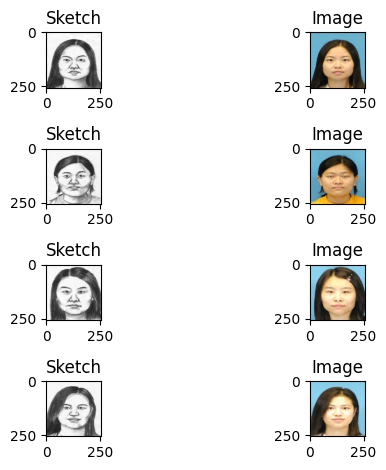

In [9]:
data = load_cuhk(main_path)

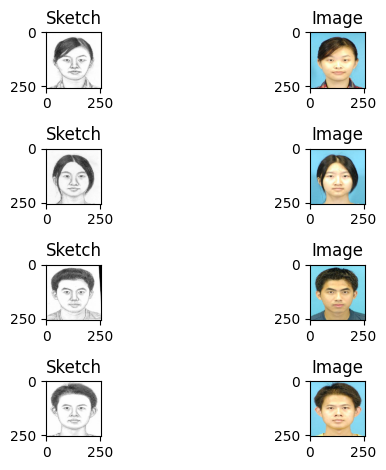

In [10]:
test_data_elements = load_cuhk(test_data_path)
test_data_elements = test_data_elements.batch(1)

#fs2k cleané détouré load

In [ ]:
IMG_SIZE = 256

def sorted_alphanumeric(data):
      convert = lambda text: int(text) if text.isdigit() else text.lower()
      alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
      return sorted(data,key = alphanum_key)

liste_photo1_names = [f"image{str(num).zfill(4)}.jpg" for num in liste_photo1]
liste_sketch1_names = [f"sketch{str(num).zfill(4)}.jpg" for num in liste_photo1]
liste_photo2_names = [f"image{str(num).zfill(4)}.jpg" for num in liste_photo2]
liste_sketch2_names = [f"sketch{str(num).zfill(4)}.jpg" for num in liste_photo2]
liste_photo3_names = [f"image{str(num).zfill(4)}.jpg" for num in liste_photo3]
liste_sketch3_names = [f"sketch{str(num).zfill(4)}.jpg" for num in liste_photo3]
assert(len(liste_photo1_names) == len(liste_sketch1_names))
assert(len(liste_photo2_names) == len(liste_sketch2_names))
assert(len(liste_photo3_names) == len(liste_sketch3_names))
base_element = "/content/drive/My Drive/SKETCH DATA/data/FS2K_rembg/"
file_photo_1 = tf.io.gfile.glob(os.path.join(base_element + "photo/photo1/*.jpg"))
file_sketch_1 = tf.io.gfile.glob(os.path.join(base_element + "sketch/sketch1/*.jpg"))
file_photo_2 = tf.io.gfile.glob(os.path.join(base_element + "photo/photo2/*.jpg"))
file_sketch_2 = tf.io.gfile.glob(os.path.join(base_element + "sketch/sketch2/*.jpg"))
file_photo_3 = tf.io.gfile.glob(os.path.join(base_element + "photo/photo3/*.jpg"))
file_sketch_3 = tf.io.gfile.glob(os.path.join(base_element + "sketch/sketch3/*.jpg"))
selected_photos_1 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([photo for photo in file_photo_1 if os.path.basename(photo) not in liste_photo1_names]))
selected_sketches_1 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([sketch for sketch in file_sketch_1 if os.path.basename(sketch) not in liste_sketch1_names]))
selected_photos_2 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([photo for photo in file_photo_2 if os.path.basename(photo) not in liste_photo2_names]))
selected_sketches_2 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([sketch for sketch in file_sketch_2 if os.path.basename(sketch) not in liste_sketch2_names]))
selected_photos_3 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([photo for photo in file_photo_3 if os.path.basename(photo) not in liste_photo3_names]))
selected_sketches_3 = tf.data.Dataset.from_tensor_slices(sorted_alphanumeric([sketch for sketch in file_sketch_3 if os.path.basename(sketch) not in liste_sketch3_names]))
assert(len(selected_photos_1) == len(selected_sketches_1))
assert(len(selected_photos_2) == len(selected_sketches_2))
assert(len(selected_photos_3) == len(selected_sketches_3))
#cell to run to train on file 1 f fs2k clean only
photo_data = selected_photos_1
sketch_data = selected_sketches_1
assert(len(photo_data) == len(sketch_data) and len(photo_data) != 0)

def load_fs2k_clean():
  def load_data(photo, sketch):
      image_photo = tf.io.read_file(photo)
      image_photo = tf.io.decode_jpeg(image_photo)
      image_sketch = tf.io.read_file(sketch)
      image_sketch = tf.io.decode_jpeg(image_sketch)
      image_sketch = tf.cast(image_sketch, tf.float32)
      image_photo  = tf.cast(image_photo, tf.float32)
      image_sketch = tf.image.resize(image_sketch, [IMG_SIZE, IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
      image_photo = tf.image.resize(image_photo, [IMG_SIZE,IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
      image_sketch = image_sketch/255.
      image_photo = image_photo/255.
      return image_sketch, image_photo
  merged_data = tf.data.Dataset.zip((photo_data, sketch_data))
  new_data = merged_data.map(lambda x, y: load_data(x,y))
  for element in new_data.take(1):
      fig, ax = plt.subplots(2,1)
      ax[0].imshow(element[0].numpy())
      ax[1].imshow(element[1].numpy())
      print("Shape of sketch: " , element[1].shape)
      print("Shape of image: ", element[0].shape)
  return new_data
data = load_fs2k_clean()
print(len(data))
test_data_elements = data.take(5).batch(1)

AssertionError: ignored

In [ ]:
len(selected_photos_1)

452

In [ ]:
for el in data.take(1):
  init = el[1]
for el in data.take(100):
  init += el[1]

plt.imshow(init/101)

NotFoundError: ignored

#fs2k load

In [ ]:
# for the fs2k dataset

#for file in os.listdir("./FS2K/sketch/sketch2"):
    #os.rename(os.path.join("./FS2K/sketch/sketch2",file), os.path.join("./FS2K/sketch/sketch2",file.split(".")[0]+".jpg"))


base_element = "/content/drive/My Drive/SKETCH DATA/data/FS2K_rembg/"
IMG_SIZE = 256


def load_fs2k():


  def load_data(photo, sketch, data_augmentation = False):


      image_photo = tf.io.read_file(photo)
      image_photo = tf.io.decode_jpeg(image_photo)


      image_sketch = tf.io.read_file(sketch)
      image_sketch = tf.io.decode_jpeg(image_sketch)

      image_sketch = tf.cast(image_sketch, tf.float32)
      image_photo  = tf.cast(image_photo, tf.float32)


      image_sketch = tf.image.resize(image_sketch, [IMG_SIZE, IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)


      image_photo = tf.image.resize(image_photo, [IMG_SIZE,IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

      #normalize data

      #image_photo = image_photo/127.5 -1
      #image_sketch = image_sketch/127.5 -1

      if data_augmentation :

          #crop images

          image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
          image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])

          # Resizing to 286x286

          image_sketch = tf.image.resize(image_sketch, [286, 286],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

          image_photo = tf.image.resize(image_photo, [286,286],
                                      method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

          # Random cropping back to 256x256

          image_photo = tf.image.random_crop(image_photo, size=[IMG_SIZE, IMG_SIZE, 3])
          image_sketch = tf.image.random_crop(image_sketch, size=[IMG_SIZE, IMG_SIZE, 3])


          if tf.random.uniform(()) > 0.5:
              # Random mirroring
              image_photo = tf.image.flip_left_right(image_photo)
              image_sketch = tf.image.flip_left_right(image_sketch)

          #transforming images into black and white, also sketches because they are in color (although they are black and white)
          #image_photo = tf.image.rgb_to_grayscale(image_photo)
          #image_sketch = tf.image.rgb_to_grayscale(image_sketch)

          image_sketch = image_sketch/255.
          image_photo = image_photo/255.

      return image_sketch, image_photo


  photo_data_1 = tf.data.Dataset.list_files(base_element + "photo/photo1/*.jpg", shuffle=False)
  photo_data_2 = tf.data.Dataset.list_files(base_element + "photo/photo2/*.jpg", shuffle=False)
  photo_data_3 = tf.data.Dataset.list_files(base_element + "photo/photo3/*.jpg", shuffle=False)


  print(photo_data_1.cardinality().numpy())
  print(photo_data_2.cardinality().numpy())
  print(photo_data_3.cardinality().numpy())

  sketch_data_1 = tf.data.Dataset.list_files(base_element + "sketch/sketch1/*.jpg", shuffle=False)
  sketch_data_2 = tf.data.Dataset.list_files(base_element + "sketch/sketch2/*.jpg", shuffle=False)
  sketch_data_3 = tf.data.Dataset.list_files(base_element + "sketch/sketch3/*.jpg", shuffle=False)

  print(sketch_data_1.cardinality().numpy())
  print(sketch_data_2.cardinality().numpy())
  print(sketch_data_3.cardinality().numpy())

  photo_data = photo_data_1.concatenate(photo_data_2)
  photo_data = photo_data.concatenate(photo_data_3)

  sketch_data = sketch_data_1.concatenate(sketch_data_2)
  sketch_data = sketch_data.concatenate(sketch_data_3)

  merged_data = tf.data.Dataset.zip((photo_data, sketch_data))

  new_data = merged_data.map(lambda x, y: load_data(x,y,data_augmentation = True))

  for element in new_data.take(1):

      fig, ax = plt.subplots(2,1)

      ax[0].imshow(element[0].numpy())
      ax[1].imshow(element[1].numpy())


      print("Shape of sketch: " , element[1].shape)
      print("Shape of image: ", element[0].shape)
  return new_data

1526
98
475
1526
98
475
Shape of sketch:  (256, 256, 3)
Shape of image:  (256, 256, 3)


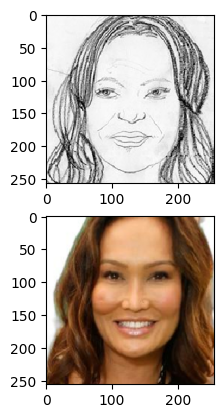

In [ ]:
data = load_fs2k()
test_data_elements = data.take(5).batch(1)

# train test split

In [ ]:
train_ratio = 0.9
BUFFER_SIZE = 10
BATCH_SIZE = 1
DATASET = data_fs2k_ultime

length = DATASET.cardinality().numpy()
train_index = int(length*train_ratio)


data = DATASET.shuffle(BUFFER_SIZE)

train_data = data.take(train_index)
test_data = data.skip(train_index).take(length - train_index)

train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_data = test_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#code structure

In [ ]:
OUTPUT_CHANNELS = 3


def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result



def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result


In [ ]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target, face_disc_generated_output, nez_disc_generated_output, lambda_element = 100):
  gan_loss =  loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
  #gan_loss = wasserstein_loss(tf.zeros_like(disc_generated_output), disc_generated_output)
  face_loss = loss_object(tf.ones_like(face_disc_generated_output), face_disc_generated_output)
  nez_loss = loss_object(tf.ones_like(nez_disc_generated_output), nez_disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
  total_gen_loss = gan_loss + (lambda_element * l1_loss) + 0.5 * face_loss + 0.5 * nez_loss

  return total_gen_loss, gan_loss, l1_loss

In [ ]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [ ]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [ ]:
generator = Generator()

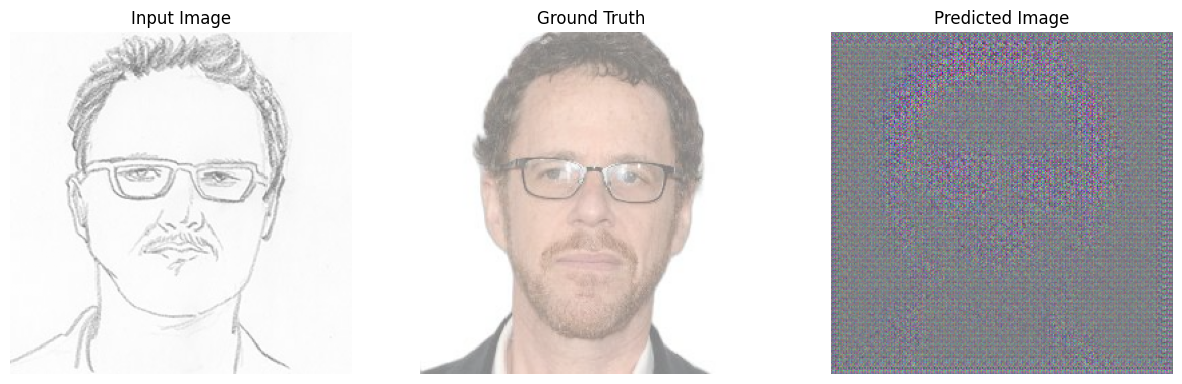

In [ ]:
for example_input, example_target in train_data.take(1):
  generate_images(generator, example_input, example_target)

# IPython

In [ ]:
import datetime
import time

log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
from IPython import display

display.IFrame(
    src="https://tensorboard.dev/experiment/lZ0C6FONROaUMfjYkVyJqw",
    width="100%",
    height="1000px")

# code train model

In [ ]:
def save_images(generator, example_inputs, step, test_element):

  #names of the elements in the batch containing the images used to test the model
  elements = ["test1","test2","test3","test4","test5"]

  #if the directories in which we want to save the result do not exist, we create them
  #test_element is a name used to identify a specific test, for instance "test_lambda"
  if not os.path.exists(f"/content/drive/My Drive/SKETCH DATA/data/{test_element}"):

    os.mkdir(f"/content/drive/My Drive/SKETCH DATA/data/{test_element}")

    for element in elements :

        #directory containg all the results for a specific test
        os.mkdir(f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{element}")

        #generated images, at each epochs
        os.mkdir(f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{element}/images")

        #target image
        os.mkdir(f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{element}/target_image")

        # sketch
        os.mkdir(f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{element}/sketch")

  #if the step is the first one, we save the sketch and the photo for the 5 elements in our dataset
  if step == 0:
    for index, image_elements in enumerate(example_inputs.take(5)):
      target_path = f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{elements[index]}/target_image"
      tf.keras.utils.save_img(os.path.join(target_path,f"target.jpg"), image_elements[0][0])
      sketch_path = f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{elements[index]}/sketch"
      tf.keras.utils.save_img(os.path.join(sketch_path,f"input.jpg"),image_elements[1][0])

  # we save our generated data
  for index, element in enumerate(example_inputs.take(5)):
    image = generator(element[0], training = True)
    path = f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{elements[index]}/images"
    tf.keras.utils.save_img(os.path.join(path,f"test_image_step_{step}.jpg"), image[0])

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(10e-4, beta_1=0.5)
face_discriminator_optimizer = tf.keras.optimizers.Adam(10e-4, beta_1=0.2)
nez_discriminator_optimizer = tf.keras.optimizers.Adam(10e-4, beta_1=0.2)

generator = Generator()
discriminator = Discriminator()
face_discriminator = Discriminator()
nez_discriminator = Discriminator()

@tf.function
def train_step(input_image, target, step, lambda_element):

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape, tf.GradientTape() as face_disc_tape, tf.GradientTape() as nez_disc_tape:

    gen_output = generator(input_image, training=True)

#premier discriminateur (toute la tête)
    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

#création des zooms pour les yeux et le nez
    cropping_layer = tf.keras.layers.Cropping2D(cropping = ((80, 90),(70,70)))

    gen_output_face = cropping_layer(gen_output)
    gen_output_face = tf.squeeze(gen_output_face)
    gen_output_face = tf.image.resize(gen_output_face, size = (256,256))
    gen_output_face = tf.expand_dims(gen_output_face, axis = 0)
    gen_output_face = tf.cast(gen_output_face, tf.int32)

    target_face = cropping_layer(target)
    target_face = tf.squeeze(target_face)
    target_face = tf.image.resize(target_face, size = (256,256))
    target_face = tf.expand_dims(target_face, axis = 0)
    target_face = tf.cast(target_face, tf.int32)

    input_image_face = cropping_layer(input_image)
    input_image_face = tf.squeeze(input_image_face)
    input_image_face = tf.image.resize(input_image_face, size = (256,256))
    input_image_face = tf.expand_dims(input_image_face, axis = 0)
    input_image_face = tf.cast(input_image_face, tf.int32)


#creation des zooms pour la bouche et le menton
    cropping_layer_nez = tf.keras.layers.Cropping2D(cropping = ((130,30),(70,70)))

    gen_output_nez= cropping_layer_nez(gen_output)
    gen_output_nez = tf.squeeze(gen_output_face)
    gen_output_nez= tf.image.resize(gen_output_face, size = (256,256))
    gen_output_nez = tf.expand_dims(gen_output_face, axis = 0)
    gen_output_nez = tf.cast(gen_output_face, tf.int32)

    target_nez = cropping_layer(target)
    target_nez= tf.squeeze(target_face)
    target_nez = tf.image.resize(target_face, size = (256,256))
    target_nez = tf.expand_dims(target_face, axis = 0)
    target_nez = tf.cast(target_face, tf.int32)

    input_image_nez = cropping_layer(input_image)
    input_image_nez = tf.squeeze(input_image_face)
    input_image_nez = tf.image.resize(input_image_face, size = (256,256))
    input_image_nez = tf.expand_dims(input_image_face, axis = 0)
    input_image_nez = tf.cast(input_image_face, tf.int32)


#ajout d'un discirminateur pour les yeux et le nez
    face_disc_real_output = face_discriminator([input_image_face, target_face], training=True) #potentielement à tenter en faisant input_image_face
    face_disc_generated_output = face_discriminator([input_image_face, gen_output_face], training=True)

#ajout d'un discirminateur pour la bouche et le mention

    nez_disc_real_output = nez_discriminator([input_image_nez, target_nez], training=True) #potentielement à tenter en faisant input_image_face
    nez_disc_generated_output = nez_discriminator([input_image_nez, gen_output_nez], training=True)

#gen loss
    gen_total_loss = generator_loss(disc_generated_output, gen_output, target, face_disc_generated_output, nez_disc_generated_output, lambda_element)[0]

    #print(gen_total_loss)
#disc loss
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)
#face disc loss
    face_disc_loss = discriminator_loss(face_disc_real_output, face_disc_generated_output)
#nez disc loss
    nez_disc_loss = discriminator_loss(nez_disc_real_output, nez_disc_generated_output)


  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)


  # face discriminator
  face_discriminator_gradients = face_disc_tape.gradient(face_disc_loss,
                                               face_discriminator.trainable_variables)

  # nez discriminator
  nez_discriminator_gradients = nez_disc_tape.gradient(nez_disc_loss,
                                               nez_discriminator.trainable_variables)




  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))


# face optimizer
  face_discriminator_optimizer.apply_gradients(zip(face_discriminator_gradients,
                                              face_discriminator.trainable_variables))
# nez optimizer
  nez_discriminator_optimizer.apply_gradients(zip(nez_discriminator_gradients,
                                              nez_discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    #tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    #tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    #tf.summary.scalar('disc_loss', disc_loss, step=step//1000)


In [ ]:
import time

def fit(train_ds, test_ds, steps, beta1 = 0.5, beta2 = 0.5, lambda_element = 100):
  start = time.time()


  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 100 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)

      #(generator, example_input, step, test_element)

      print(f"Step: {step}")

    if input_image.shape[3] == 3:
      train_step(input_image, target, step, lambda_element)

    # Training step
    element = steps//10

    if (step) % element == 0:
      save_images(generator, test_data_elements, step, TEST_ELEMENT )
      print('.', end='', flush=True)

    #Save (checkpoint) the model every 5k steps
    #if (step + 1) % 5000 == 0:
      #checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
def launch_tests(generator):

  IMG_SIZE = 256
  tests_list = []


  chinese_boy = tf.keras.utils.load_img("/content/drive/My Drive/SKETCH DATA/data/FS2K_rembg/Test element/sketch/sketch0132.jpg")
  chinese_boy_image = tf.keras.utils.img_to_array(chinese_boy)/255.
  chinese_boy_image = tf.image.resize(chinese_boy_image, [IMG_SIZE, IMG_SIZE],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  eliot = tf.keras.utils.load_img("/content/drive/My Drive/SKETCH DATA/data/test_images/eliot_dessin.jpg")
  eliot_image = tf.keras.utils.img_to_array(eliot)/255.
  eliot_image = tf.image.resize(eliot_image, [IMG_SIZE, IMG_SIZE],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  donald = tf.keras.utils.load_img("/content/drive/My Drive/SKETCH DATA/data/trump.jpg")
  donald_image = tf.keras.utils.img_to_array(donald)/255.
  donald_image = tf.image.resize(donald_image, [IMG_SIZE, IMG_SIZE],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  bonhomme = tf.keras.utils.load_img("/content/drive/My Drive/SKETCH DATA/data/bonhomme.jpg")
  bonhomme_image = tf.keras.utils.img_to_array(bonhomme)/255.
  bonhomme_image = tf.image.resize(bonhomme_image, [IMG_SIZE, IMG_SIZE],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  chinoise = tf.keras.utils.load_img("/content/drive/My Drive/SKETCH DATA/data/chinoise.jpg")
  chinoise_image = tf.keras.utils.img_to_array(chinoise)/255.
  chinoise_image =  tf.image.resize(chinoise_image, [IMG_SIZE, IMG_SIZE],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  tests_list.append(eliot_image)
  tests_list.append(donald_image)
  tests_list.append(bonhomme_image)
  tests_list.append(chinoise_image)
  tests_list.append(chinese_boy_image)
  generated = [generator(i[tf.newaxis,...], training = True)[0] for i in tests_list]

  fig = plt.figure(figsize = (20,8))

  a = tests_list + generated

  for index, image in enumerate(a):
    ax = fig.add_subplot(2,5,index+1)
    ax.imshow(image)

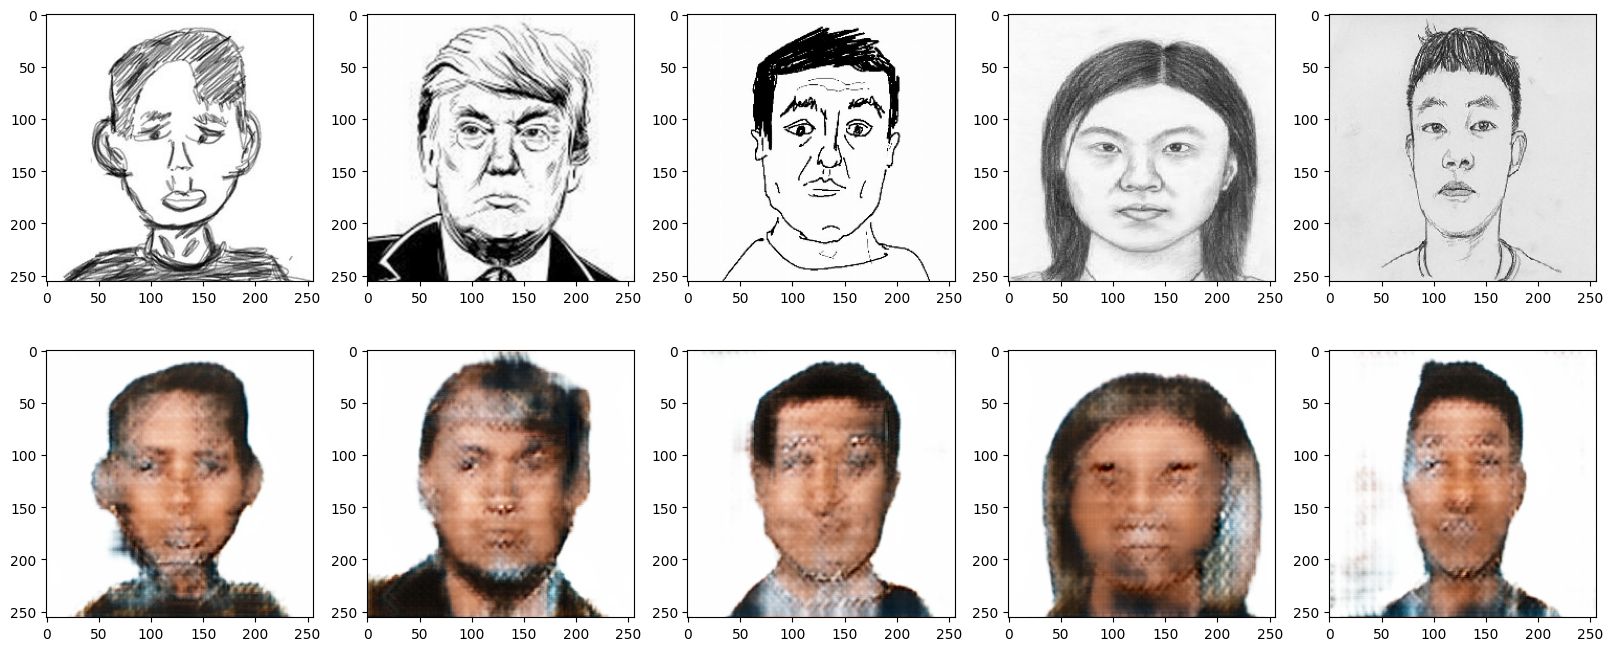

In [ ]:
launch_tests(generator)

# TRAIN AND TEST MODEL

Time taken for 1000 steps: 13.49 sec



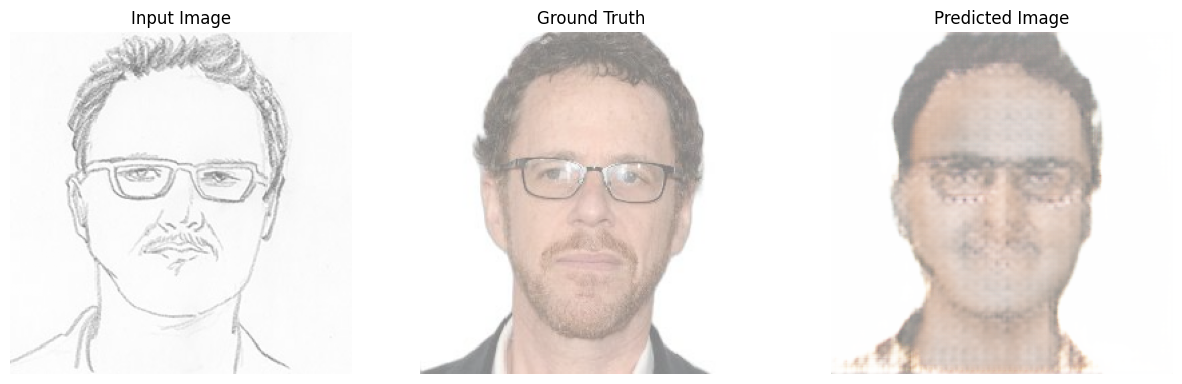

In [ ]:
#name of the directory in which the test photos will be saved
TEST_ELEMENT = "TEST ultime 1 THREE DISC"
#number of steps to train the model
STEPS = 10000

fit(train_data, test_data, steps= STEPS)

In [ ]:
generator.save("/content/drive/My Drive/SKETCH DATA/data/generator_save_0107.hd5")
discriminator.save("/content/drive/My Drive/SKETCH DATA/data/discriminator_save_0107.hd5")

In [ ]:
launch_tests(generator)

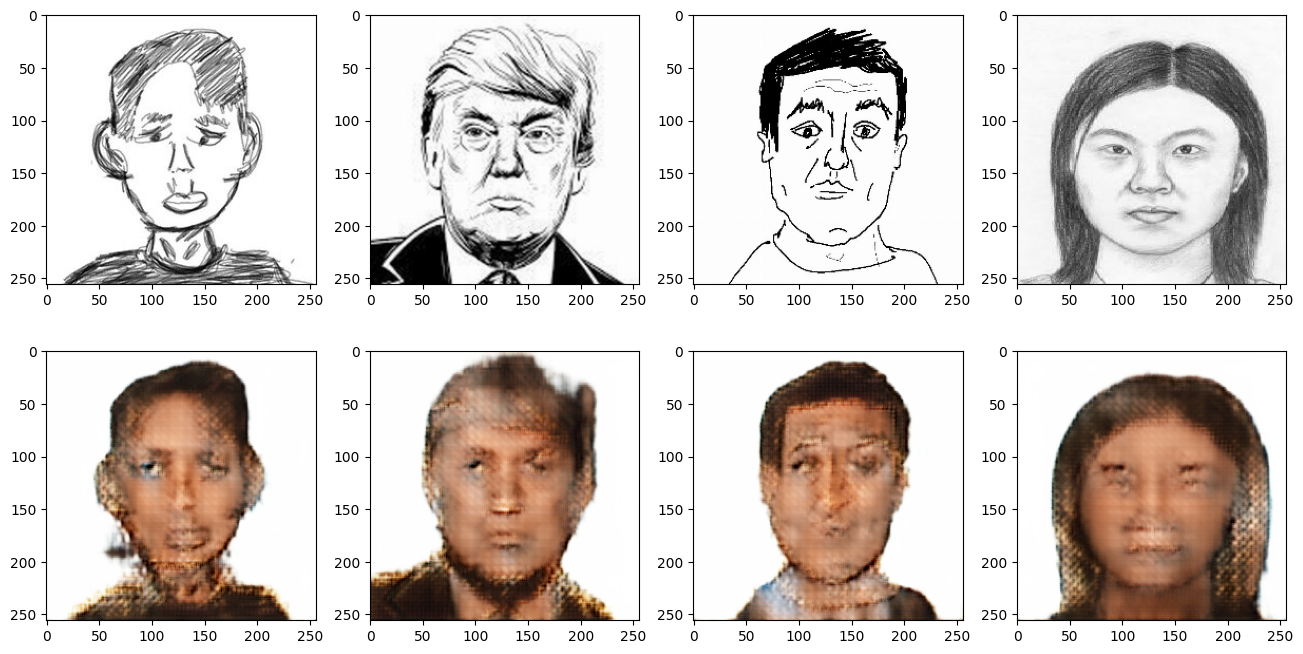

In [ ]:
launch_tests(generator) #5K epochs

In [ ]:
#sketch, image = next(data.as_numpy_iterator())

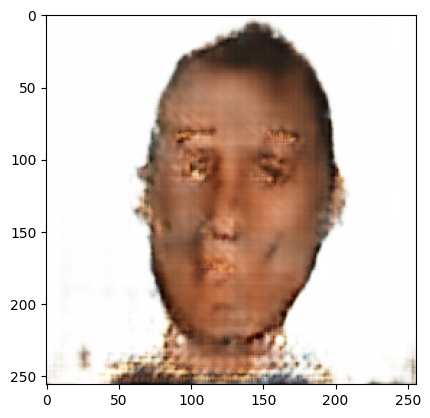

In [ ]:
bro = tf.keras.utils.load_img("/content/drive/My Drive/SKETCH DATA/data/bro.png")
bro_image = tf.keras.utils.img_to_array(bro)/255.
bro_image = tf.image.resize(bro_image, [IMG_SIZE, IMG_SIZE],
                                  method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
plt.imshow(generator(bro_image[tf.newaxis,...], training = True)[0])

In [ ]:
def preproc_crop(input_image, size_vert = (70,70), size_horizontal = (70,70), expand = True):
  img = tf.keras.layers.Cropping2D(cropping = ((150,30),(70,70)))(image[tf.newaxis, ...])
  img = tf.squeeze(img)
  img = tf.image.resize(img, size = (256,256))
  if expand == False:
    return img
  return tf.expand_dims(img, axis = 0)

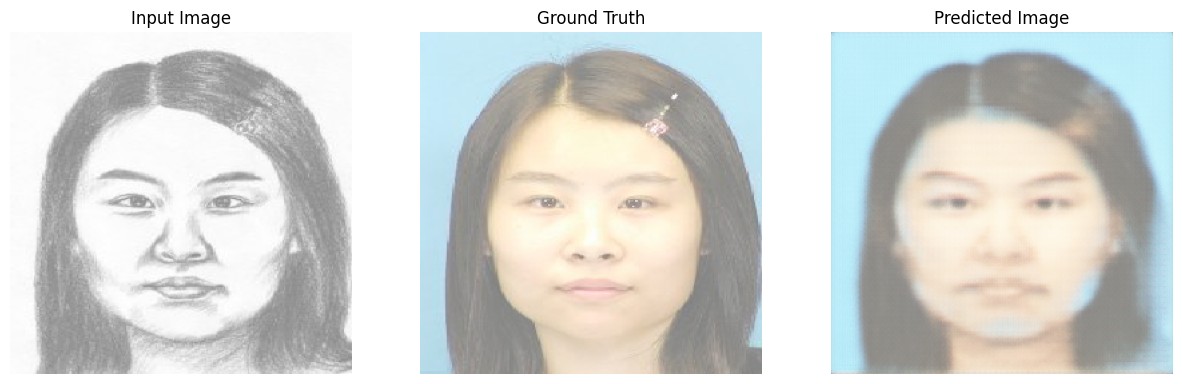

In [ ]:
for example_input, example_target in train_data.take(1):
  generate_images(generator, example_input, example_target)

In [ ]:
!ls "/content/drive/My Drive/SKETCH DATA/data/FS2K cleaned"

 anno_test.json   anno_train.json   photo   README.pdf	'Test element'


In [ ]:
#Définition des métrics de comparaison des outputs du générateurs

import imutils
import cv2
import argparse

def colorfulness(image):
	# split the image into its respective RGB components
	(B, G, R) = cv2.split(image.astype("float"))
	# compute rg = R - G
	rg = np.absolute(R - G)
	# compute yb = 0.5 * (R + G) - B
	yb = np.absolute(0.5 * (R + G) - B)
	# compute the mean and standard deviation of both `rg` and `yb`
	(rbMean, rbStd) = (np.mean(rg), np.std(rg))
	(ybMean, ybStd) = (np.mean(yb), np.std(yb))
	# combine the mean and standard deviations
	stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
	meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
	# derive the "colorfulness" metric and return it
	return stdRoot + (0.3 * meanRoot)

 #source : https://pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/

def sharpness(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image.astype(np.uint8), cv2.CV_64F).var()

In [ ]:
def show_images(test_element, steps, element):

  target_path = f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{element}/target_image"
  input_path = f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{element}/sketch"
  test_images_path = f"/content/drive/My Drive/SKETCH DATA/data/{test_element}/{element}/images"

  target_image = [file for file in os.listdir(target_path)]
  input_image = [file for file in os.listdir(input_path)]

  generated_images = [file for file in os.listdir(test_images_path)]
  generated_images = [file for file in generated_images if not file.startswith("training_cgan")]
  generated_images = [os.path.join(test_images_path, file) for file in generated_images]
  generated_images = [plt.imread(image) for image in generated_images]
  generated_images = generated_images[:10]

  target = os.path.join(target_path, target_image[0])
  target = plt.imread(target)

  input = os.path.join(input_path,input_image[0])
  input = plt.imread(input)

  fig = plt.figure(figsize = (12,6))

  ax = fig.add_subplot(2,6, 1)
  ax.imshow(input)
  ax.set_title("Sketch")

  ax = fig.add_subplot(2,6,2)
  ax.imshow(target)
  ax.set_title("Target")

  for index, image in enumerate(generated_images):
    ax = fig.add_subplot(2,6,index+3)
    ax.imshow(image)
    ax.set_title(f"{(index+1)*steps//10} epochs, sha:{sharpness(image)}, clr:{colorfulness(image)} ")

  fig.tight_layout()

  fig.savefig(f"{test_images_path}/training_cgan_test.png")

In [ ]:
for element in ["test1", "test2"]:#"test3","test4","test5"]:
  show_images(TEST_ELEMENT, 1000, element)

IndexError: ignored